In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.display import display
import sys
import os
import logging

sys.path.insert(0,'../src')
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100

In [3]:
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

logger = logging.getLogger("feat_viz")
logging.basicConfig(format='[%(name)s %(levelname)s] %(message)s', level=logging.INFO)
# import NaiveDE
# import SpatialDE

In [ ]:
from general_utils import read_spatial_expression, normalize_count_cellranger
from main_methods import select_spatial_genes
from matplotlib_venn import venn2,venn3

def plot_venn3(d, ax):
    set_labels = list(d.keys())
    subsets = [d[k] for k in set_labels]
    v=venn3(subsets=subsets, set_labels=set_labels, ax=ax)

    
# load the data for a given replicate
ddir = '/share/PI/sabatti/sc_data/spatial_ge/scGCO'
ff = ddir + '/data/Raw_data/MERFISH/middle_scGCO_data_matrix.csv'
locs,data=read_spatial_expression(ff,sep=' ')
data_norm = normalize_count_cellranger(data)

fig, ax = plt.subplots(1,1, figsize=(6, 4))
ax.scatter(*locs.T, c='k')
plt.axis('equal')
plt.show()
alpha= 0.05

# run our method
pvals, rej_idx = select_spatial_genes(locs, data_norm.values, knn=4, alpha=alpha, n_perm=10000)
ours = data.columns[rej_idx]
print(ours.shape)

raw data dim: (1056, 140)


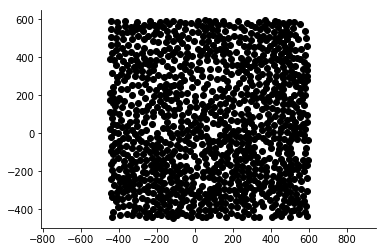

(122,)


In [6]:
fn =  ddir+'/data/MERFISH/our_results/MERFISH_result_df.csv'
save_data_to_file

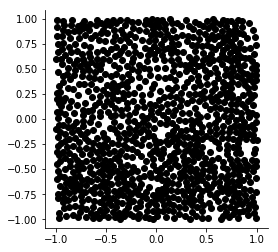

In [7]:
# center the locations to zero and 1
dat = pd.DataFrame(locs, columns=['x', 'y'])
def center_unit(x):
    shift = (max(x) + min(x)) / 2
    scale = (max(x) - min(x)) / 2
    return (x - shift) / scale
dat['x'] = center_unit(dat['x'])
dat['y'] = center_unit(dat['y'])
fig, ax = plt.subplots(1,1, figsize=(4, 4))
ax.scatter(dat['x'], dat['y'], c='k')
plt.axis('equal')
plt.show()

In [8]:
def patterns(name, x, y):
    vals = x ** 2 + y ** 2
    return vals


In [9]:
fileName = ddir + "/data/MERFISH/scGCO_results/MERFISH_result_df.csv"
result_df = pd.read_csv(fileName, index_col=0)
print(result_df.shape)
fdr05 = result_df[result_df.fdr < 0.05].sort_values(by=['fdr'])
print(fdr05.shape[0])

(140, 1052)
84


In [10]:
de = ddir + "/data/MERFISH/spatialDE_results/middle_final_results.csv"
counts_de = pd.read_csv(de,index_col=0)
counts_de=counts_de[counts_de.qval<0.05]
counts_de=counts_de[counts_de.g.values != 'log_total_count']
print(counts_de.shape[0])

91


In [11]:
gsets = {
        'scGCO': set(fdr05.index.values),
        'SpatialDE': set(counts_de.g.values),
        'Ours': set(data_norm.columns[rej_idx])
    }

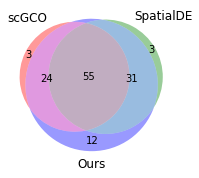

In [12]:
def plot_venn3(d, ax):
    set_labels = list(d.keys())
    subsets = [d[k] for k in set_labels]
    v=venn3(subsets=subsets, set_labels=set_labels, ax=ax)
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
plot_venn3(gsets, ax)
plt.show()